In [358]:
import matplotlib.pyplot as plt
import numpy as np

In [355]:
class Stack:
    def __init__(self):
        self.stack = []

    def add(self, dataval):
        self.stack.append(dataval)
        
    def remove(self):
        if len(self.stack) <= 0:
            raise()
        else:
            return self.stack.pop()
        
class Linha():
    
    def __init__(self, start_position, end_position, size, width, color):
        self.size = size
        self.width = width
        self.color = color
        self.start_position = start_position
        self.end_position = end_position

class L_system():

    def __init__(self, initial_string, re_write_rules, size = 1, width = 1, color = '#000000'):
        '''
        re_write_rules - dicionário com as regras de produção para cada simbolo
        symbols - lista de simbolos que não serão ignorados pelo programa
        O caractere padrão para o desenho de uma linha é "F"
        '''
        self.d_position, self.lines, self.angle, self.angle_diff = (0,0), [], 90, 33
        self.size, self.d_width, self.d_color = size, width, color
        self.string = initial_string
        self.re_write_rules = re_write_rules
        self.stack_pos = Stack()
        self.stack_angle = Stack()
        self.angle_operations = {
            '+' : lambda x : x.angle + self.angle_diff,
            '-' : lambda x : x.angle - self.angle_diff
        }
        self.position_operators = {
            'F' : self.draw_segment
        }
        self.storage_operators = {
            '[' : self.store_state,
            ']' : self.return_state
        }
    
    def set_color(self, color):
        self.color = color
    
    def set_width(self, width):
        self.width = width
        
    def store_state(self):
        self.stack_pos.add(self.position)
        self.stack_angle.add(self.angle)
            
    def return_state(self):
        self.position = self.stack_pos.remove()
        self.angle = self.stack_angle.remove()
        
    def rotate(self):
        theta = np.radians(self.angle - 90)
        c, s = np.cos(theta), np.sin(theta)
        R = np.array(((c, -s), (s, c)))
        return R.dot(np.array([self.size,0]))


    def draw_segment(self):
        self.lines.append(Linha(self.position,
                                self.position + self.rotate(),
                                self.size,
                                self.width,
                                self.color))
        self.position = self.position + self.rotate()

        
    def step(self):
        self.width, self.color = self.d_width, self.d_color
        self.position = (0,0)
        self.lines = []
        holder = 0
        
        for sub_string in self.re_write_rules.keys():
            self.string = self.string.replace(sub_string, self.re_write_rules[sub_string])
        
        for carac in self.string:
                if carac in self.angle_operations.keys():
                    self.angle = self.angle_operations[carac](self)

                elif carac in self.position_operators.keys():
                    self.position_operators[carac]()

                elif carac in self.storage_operators.keys():
                    self.storage_operators[carac]()
    
    def plot(self):
        x = []
        y = []
        for line in self.lines:
            plt.plot([line.start_position[1],line.end_position[1]],
                     [line.start_position[0],line.end_position[0]],
                     linestyle = '-',
                     linewidth = line.width,
                     color = line.color)
        a.lines = []
        plt.axis('equal')
        plt.axis('off')
            
            
            
        

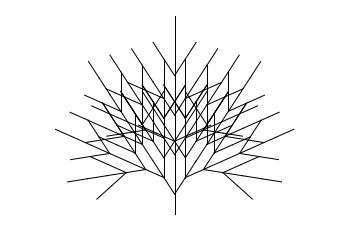

In [357]:
a = L_system('X', {'X':'F[+X][-X]FX'})

for i in range(0,5):
    a.step()
    
a.plot()